<a href="https://colab.research.google.com/github/inesCherif/FirstSocialMedia/blob/main/Benchmarking_Sorts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import random
import time

def generate_array(n):
    """Generates an array of size n with random integers."""
    return [random.randint(1, 10000) for _ in range(n)]

def measure_time(sort_function, arr):
    """Measures the time taken by a sorting function."""
    start_time = time.time()
    sort_function(arr)
    end_time = time.time()
    return end_time - start_time

In [14]:
def heapify(arr, n, i):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2

    if left < n and arr[i] < arr[left]:
        largest = left

    if right < n and arr[largest] < arr[right]:
        largest = right

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0

        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

def shell_sort(arr):
    n = len(arr)
    gap = n // 2

    while gap > 0:
        for i in range(gap, n):
            temp = arr[i]
            j = i
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
            arr[j] = temp
        gap //= 2

def counting_sort(arr, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10

    for i in range(n):
        index = arr[i] // exp
        count[index % 10] += 1

    for i in range(1, 10):
        count[i] += count[i - 1]

    i = n - 1
    while i >= 0:
        index = arr[i] // exp
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1

    for i in range(n):
        arr[i] = output[i]

def radix_sort(arr):
    max_num = max(arr)
    exp = 1
    while max_num // exp > 0:
        counting_sort(arr, exp)
        exp *= 10


Testing random array of size 100
Merge Sort: Mean=0.000765s, Median=0.000754s, StdDev=0.000066s
Quick Sort: Mean=0.000380s, Median=0.000372s, StdDev=0.000020s
Heap Sort: Mean=0.001211s, Median=0.001214s, StdDev=0.000063s
Shell Sort: Mean=0.000361s, Median=0.000356s, StdDev=0.000013s
Radix Sort: Mean=0.000320s, Median=0.000271s, StdDev=0.000080s

Testing random array of size 1000
Merge Sort: Mean=0.010921s, Median=0.010763s, StdDev=0.000509s
Quick Sort: Mean=0.005490s, Median=0.004941s, StdDev=0.001306s
Heap Sort: Mean=0.019704s, Median=0.020068s, StdDev=0.002257s
Shell Sort: Mean=0.012550s, Median=0.012441s, StdDev=0.000985s
Radix Sort: Mean=0.006032s, Median=0.006456s, StdDev=0.000874s

Testing random array of size 10000
Merge Sort: Mean=0.152803s, Median=0.153265s, StdDev=0.006535s
Quick Sort: Mean=0.044039s, Median=0.037407s, StdDev=0.013803s
Heap Sort: Mean=0.149471s, Median=0.149135s, StdDev=0.004072s
Shell Sort: Mean=0.115474s, Median=0.116524s, StdDev=0.004385s
Radix Sort: Mean

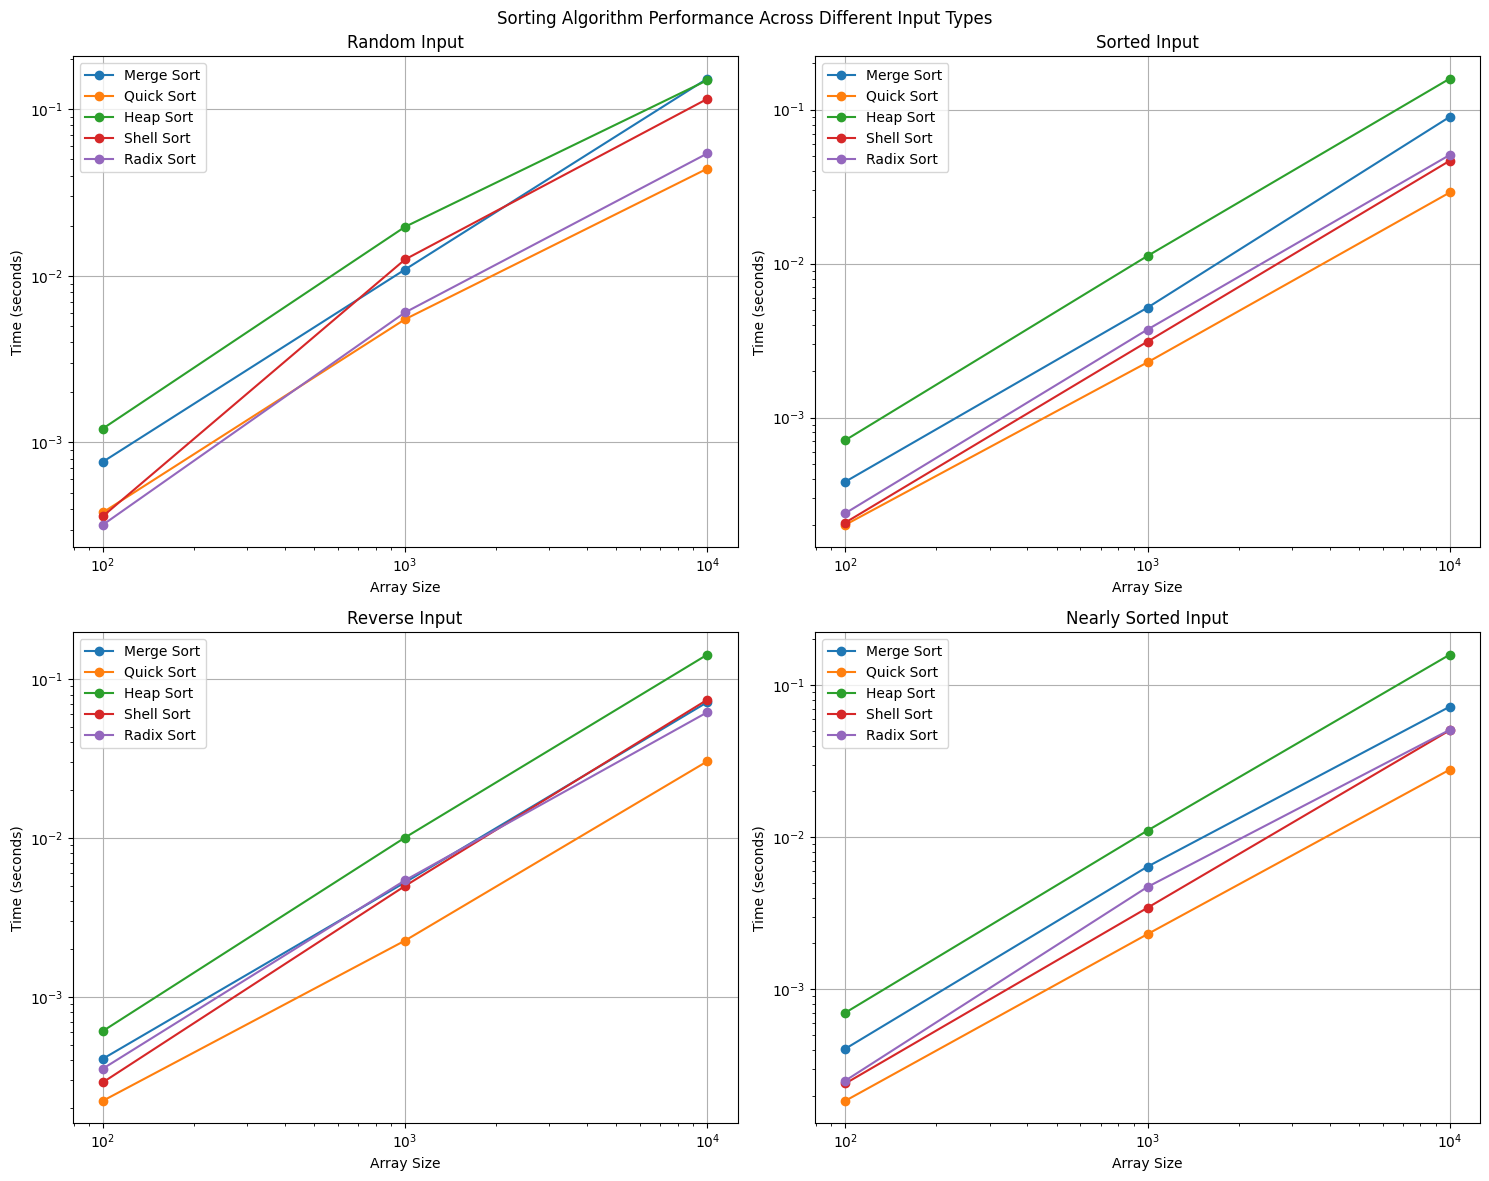

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import statistics

def benchmark_sort(sort_func, arr, num_runs=5):
    times = []
    for _ in range(num_runs):
        arr_copy = arr.copy()
        start = time()
        sort_func(arr_copy)
        end = time()
        times.append(end - start)
    return {
        'mean': statistics.mean(times),
        'median': statistics.median(times),
        'stddev': statistics.stdev(times) if len(times) > 1 else 0
    }

def generate_test_cases(size):
    return {
        'random': np.random.randint(0, size, size),
        'sorted': np.arange(size),
        'reverse': np.arange(size, 0, -1),
        'nearly_sorted': np.arange(size) + np.random.randint(-5, 5, size)
    }

def main():
    sizes = [100, 1000, 10000]
    algorithms = {
        'Merge Sort': merge_sort,
        'Quick Sort': quick_sort,
        'Heap Sort': heap_sort,
        'Shell Sort': shell_sort,
        'Radix Sort': radix_sort
    }

    results = {}
    for case_name in ['random', 'sorted', 'reverse', 'nearly_sorted']:
        results[case_name] = {alg: {'sizes': [], 'times': []} for alg in algorithms}

        for size in sizes:
            test_cases = generate_test_cases(size)
            arr = test_cases[case_name]

            print(f"\nTesting {case_name} array of size {size}")
            for alg_name, alg_func in algorithms.items():
                stats = benchmark_sort(alg_func, arr)
                print(f"{alg_name}: Mean={stats['mean']:.6f}s, "
                      f"Median={stats['median']:.6f}s, "
                      f"StdDev={stats['stddev']:.6f}s")

                results[case_name][alg_name]['sizes'].append(size)
                results[case_name][alg_name]['times'].append(stats['mean'])

    # Plotting
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Sorting Algorithm Performance Across Different Input Types')

    for idx, (case_name, case_results) in enumerate(results.items()):
        ax = axes[idx // 2, idx % 2]
        for alg_name, data in case_results.items():
            ax.plot(data['sizes'], data['times'], marker='o', label=alg_name)

        ax.set_xlabel('Array Size')
        ax.set_ylabel('Time (seconds)')
        ax.set_title(f'{case_name.replace("_", " ").title()} Input')
        ax.grid(True)
        ax.legend()
        ax.set_xscale('log')
        ax.set_yscale('log')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()